# Lesson Outline
- Brief Intro to Reinforcement Learning
- What is Gymnasium
- Frozen Lake Challenge
- Q Learning
- The Exploration and Exploitation Dilemma
- Extra (Deep Reinforcement Learning)



| ![image](images/intro_image.png "Intro_to_RL") |
|:---:|


#                                                                                                       <div align="center">The Frozen Lake chalenge</div>

<div style="text-align: center;">
  <img src="images/frozen_lake.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>

image source : https://medium.com/mlearning-ai/a-deep-dive-into-reinforcement-learning-q-learning-and-deep-q-learning-on-a-10x10-frozenlake-c76d56810a46
Author : Nandan Grover

In [1]:
# to clone this repo git clone https://github.com/sokistar24/7088_cem_rl.git

In [8]:
# Importing libraries
# https://gymnasium.farama.org/
import numpy as np 
import gymnasium as gym
import  matplotlib.pyplot as plt
import time

In [9]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

In [32]:
env.reset()
for step in range(50):
    
    env.render()
    action = env.action_space.sample() # 
    observation,reward,terminated,truncated,info = env.step(action)
    time.sleep(0.5)
    if terminated or truncated:
        env.reset()
env.close()


# <div align="center">Initializing and updating the Q-table</div>


<div style="text-align: center;">
  <img src="images/Q_table_initial.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>


In [10]:
# initialize the Q table to zero with size of the states and actions
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [11]:

print (Q)
# a numpy arrays of zeros

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


$$
Q(s_t, a_t) = R_{t+1} + 
\boxed{
\begin{array}{l}
\gamma \cdot R_{t+2} + 
\gamma^2 \cdot R_{t+3} + 
\gamma^3 \cdot R_{t+4} + 
\cdots
\end{array}
}
$$


$$
Q(s_{t+1}, a_{t+1}) = R_{t+2} + 
\boxed{
\begin{array}{l}
\gamma \cdot R_{t+3} + 
\gamma^2 \cdot R_{t+4} + 
\gamma^3 \cdot R_{t+5} + 
\cdots
\end{array}
}
$$


$$
{Q(s_t, a_t) =  \sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1}}
$$


$$
Q(s_t, a_t) = R_{t+1} + 
\boxed{
\begin{array}{l}
\gamma \cdot Q(s_{t+1}, a_{t+1})  
\end{array}
}
$$


$$
Q_{\text{target}}(s_t, a_t) = R_{t+1} + \gamma \max_{a} Q(s_{t+1}, a)
$$

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t)]
$$


$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [ 
\boxed{
\begin{array}{l}
R_{t+1} +\gamma \max_{a} Q(s_{t+1}, a)
\end{array}
}
- Q(s_t, a_t)]
$$


$$
Q_{new} \leftarrow Q_{current} +\alpha( error)
$$

$$
Q_{new} \leftarrow Q_{current} +\alpha[Q_{target}-Q_{current}]
$$

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [R_{t+1} +\gamma \max_{a} Q(s_{t+1}, a)- Q(s_t, a_t)]
$$


<div style="text-align: center;">
  <img src="images/Goal_state.png" alt="Frozen Lake" title="Frozen Lake" width="500" height="auto" />
</div>


# Exploitation versus Exploration tradeoff

$$
a_t =
\begin{cases}
\text{argmax}_{a} Q(s_t, a), & \text{with probability } 1 - \epsilon_t \\
\text{random action}, & \text{with probability } \epsilon_t
\end{cases}
$$


In [12]:
def epsilon_greedy_action_selection(epsilon,Q,state):
    
    random_number = np.random.random()
    if random_number > epsilon:
        action = np.argmax(Q[state,:])
    else:
        action = env.action_space.sample()
    return action

$$
\epsilon_t = \epsilon_{\text{min}} + (\epsilon_{\text{max}} - \epsilon_{\text{min}}) \cdot e^{-\text{decay rate} \cdot t}
$$

In [13]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01
epoch = 20000

In [14]:
#function to reduce the exploration
def reduce_epsilon(epsilon,epoch):
    
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate * epoch)

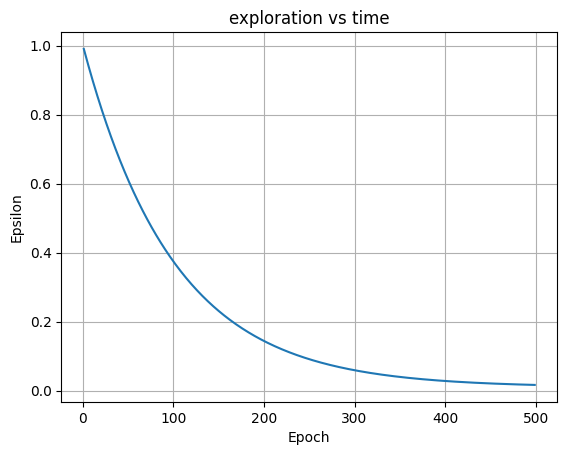

In [15]:

epochs = np.arange(1, 500)
epsilons = [reduce_epsilon(epsilon, epoch) for epoch in epochs]

plt.plot(epochs, epsilons)
plt.xlabel('Epoch')
plt.ylabel('Epsilon')
plt.title('exploration vs time')
plt.grid()
plt.show()



In [16]:
# Learning parameters
Alpha = 0.8 # Learning rate
Gamma = 0.9 # discount factor 


In [17]:
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

In [19]:
# Training loop
episodes = 20000
rewards = []
cum_reward=0
for episode in range(episodes):
    # initialize the environment 
    
    state,info = env.reset()

    truncated = False
    terminated = False
    #reward = 0 # cummulative reward
        
    while not truncated or terminated:
        """
        if np.random.random()<epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
        """
        action = epsilon_greedy_action_selection(epsilon,Q,state)
        next_state,reward,truncated,terminated,info = env.step(action)
        # calculate the Q- value
        Q[state,action] = Q[state,action] + Alpha*(reward + Gamma*np.max(Q[next_state,:])- Q[state,action])                                     
        state = next_state 
        cum_reward += reward 
        #print(reward)
        if episode%500 ==0 :
            print(f'total cumulative rewards at episode {episode} is {cum_reward}')
            #rewards.append(cum_reward)
            break
    epsilon = reduce_epsilon(epsilon,episode)
    rewards.append(cum_reward)    
    
env.close()  
np.save('Q.npy', Q)

total cumulative rewards at episode 0 is 0.0
total cumulative rewards at episode 500 is 370.0
total cumulative rewards at episode 1000 is 859.0
total cumulative rewards at episode 1500 is 1358.0
total cumulative rewards at episode 2000 is 1849.0
total cumulative rewards at episode 2500 is 2337.0
total cumulative rewards at episode 3000 is 2831.0
total cumulative rewards at episode 3500 is 3318.0
total cumulative rewards at episode 4000 is 3815.0
total cumulative rewards at episode 4500 is 4306.0
total cumulative rewards at episode 5000 is 4800.0
total cumulative rewards at episode 5500 is 5295.0
total cumulative rewards at episode 6000 is 5784.0
total cumulative rewards at episode 6500 is 6273.0
total cumulative rewards at episode 7000 is 6770.0
total cumulative rewards at episode 7500 is 7264.0
total cumulative rewards at episode 8000 is 7753.0
total cumulative rewards at episode 8500 is 8247.0
total cumulative rewards at episode 9000 is 8739.0
total cumulative rewards at episode 9500

Text(0.5, 1.0, 'reward vs episode')

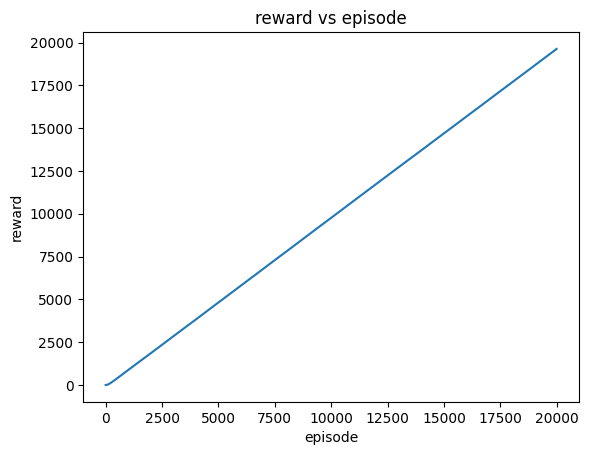

In [59]:

plt.plot(range(episodes),rewards)
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('reward vs episode')

# Visualising trained agent

In [20]:
# Reinitialize the environment 
env=gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False,render_mode='human')

In [21]:
q_table = np.load('Q.npy')
state,info = env.reset()
reward=0
round=0
for steps in range(30):
    env.render()
    action = np.argmax(q_table[state,:])
    state,reward,truncated,terminated,info = env.step(action)
    
    time.sleep(1)    
    if truncated or terminated:
        round += 1
        print(f"reward at round: {round} is = {reward}")
        state,info = env.reset()
env.close()

reward at round: 1 is = 1.0
reward at round: 2 is = 1.0
reward at round: 3 is = 1.0
reward at round: 4 is = 1.0
reward at round: 5 is = 1.0


# TODO change the grid to 10 x 10
# TODO try different exploration strategy
# TODO vary the learning rate and discount factor
# Make the environment stochastic

# Explore further 

# Apply DQN to compare performance